**Reading the Data from Yahoo finance website directly.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import yfinance as yf

symbol = "AMZN"
start_date = "2010-01-01"
end_date = "2023-05-20"

# Read the stock data using yfinance
df = yf.download(symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


**Perform cleaning.**

In [ ]:
# Drop any rows with missing values
df.dropna(inplace=True)

# Reset the index
df.reset_index(inplace=True)


**Change in Stock Price Over Time:
To analyze the change in stock price over time, you can plot a line chart using Matplotlib**

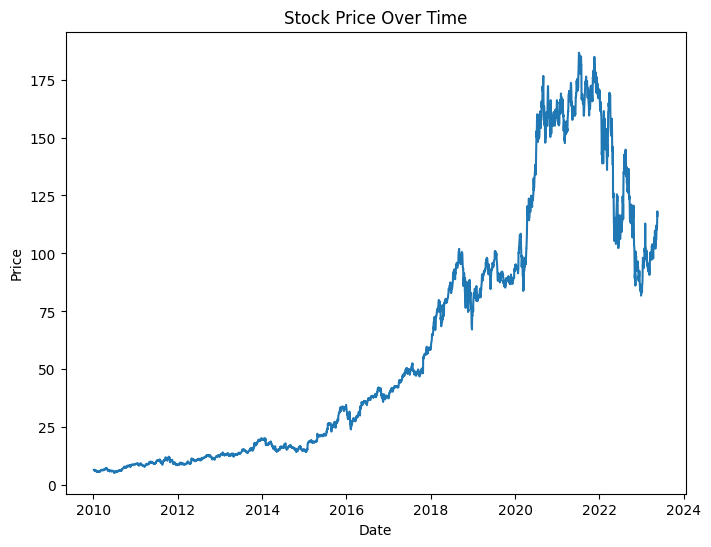

In [ ]:
# Plotting the stock price
plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


**Visualizing the Change in Volume:
To visualize the change in a stock's volume over time, you can plot a line chart.**

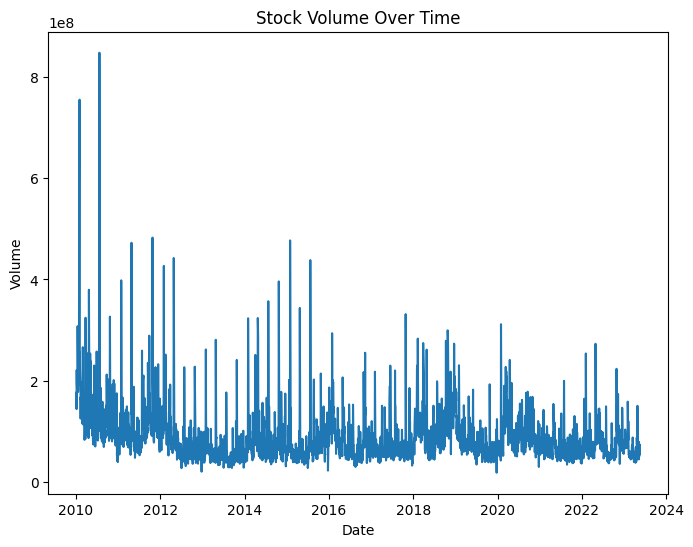

In [ ]:
# Plotting the volume
plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Volume'])
plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


**Moving Average of Stocks:
To calculate and plot the moving average of a stock, you can use the rolling() function in pandas. Here's an example for a 50-day moving average:**

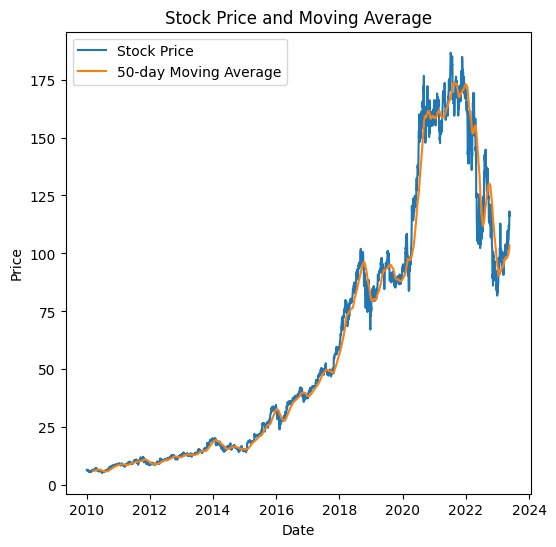

In [ ]:
# Calculate the 50-day moving average
df['MA50'] = df['Close'].rolling(window=50).mean()

# Plotting the moving average
plt.figure(figsize=(6, 6))
plt.plot(df['Date'], df['Close'], label='Stock Price')
plt.plot(df['Date'], df['MA50'], label='50-day Moving Average')
plt.title('Stock Price and Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


**Daily Return Average of a Stock:
To calculate the daily returns of a stock and its average, you can use the pct_change() function in pandas**

In [ ]:
# Calculate the daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Calculate the average daily return
avg_daily_return = df['Daily_Return'].mean()
print("Average Daily Return:", avg_daily_return)


Average Daily Return: 0.001065564084220301


**Add a new column ‘Trend’ whose values are based on the 'Daily Return'.**

In [ ]:
# Add a 'Trend' column based on the daily return values
df['Trend'] = np.where(df['Daily_Return'] >= 0, 'Up', 'Down')


**Visualize trend frequency through a Pie Chart**

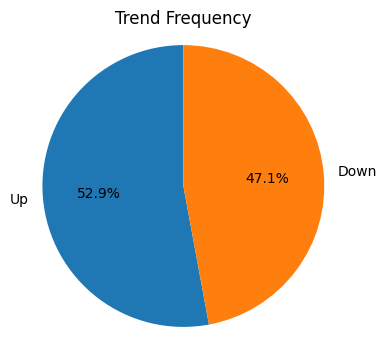

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the frequency of each trend category
trend_counts = df['Trend'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Trend Frequency')
plt.axis('equal')
plt.show()


**Finding the correlation between the daily returns of different stocks**

In [ ]:
# Read the stock data for Apple, Google, Microsoft, and Amazon
symbols = ["AAPL", "GOOGL", "MSFT", "AMZN"]
start_date = "2010-01-01"
end_date = "2023-05-20"

# Retrieve the daily close prices for the selected stocks
df = pd.DataFrame()
for symbol in symbols:
    stock_data= yf.download(symbol, start=start_date, end=end_date)
    df[symbol] = stock_data["Close"]

# Calculate the daily returns for each stock
returns = df.pct_change()

# Calculate the correlation matrix of the daily returns
correlation = returns.corr()

# Display the correlation matrix
print(correlation)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
           AAPL     GOOGL      MSFT      AMZN
AAPL   1.000000  0.562994  0.593700  0.489545
GOOGL  0.562994  1.000000  0.648865  0.601581
MSFT   0.593700  0.648865  1.000000  0.567856
AMZN   0.489545  0.601581  0.567856  1.000000


**Vsualising the Cor-relation
**

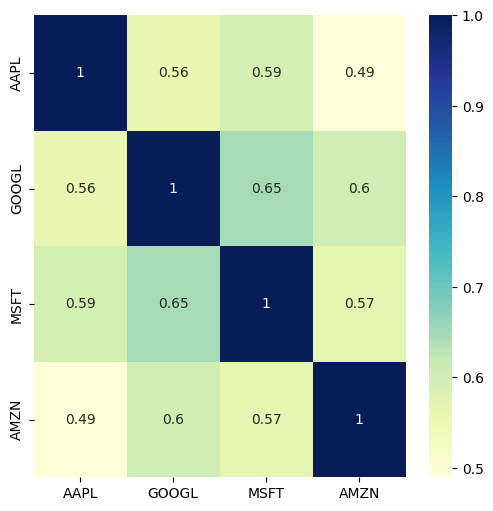

In [ ]:
#Let's check the correlation coefficients to see which variables are highly correlated 
plt.figure(figsize = (6,6))
sns.heatmap(returns.corr(),annot=True,cmap='YlGnBu')
plt.show()